# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

<font color='red'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [2]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [4]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [6]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [7]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.10 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [8]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>




<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [9]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    w = np.zeros_like(dim)
    b = 0
    #initialize the weights to zeros array of (dim,1) dimensions
    #initialize bias to zero

    return w,b

In [10]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [12]:
import math
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    sig = 1/(1+(math.exp(-z)))
    # compute sigmoid(z) and return

    return sig

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [14]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    sum = 0
    Ylog10Ysc = 0
    sec = 0
    for i in range(len(y_pred)):
        Ylog10Ysc = (y_true[i])*math.log(y_pred[i],10)
        sec = (1-y_true[i])*math.log((1-y_pred[i]),10)
        sum = sum + Ylog10Ysc + sec
    loss = -1*sum/int(len(y_pred))   
    return loss

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

In [16]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw_ = []
    dw_ = x*(y - sigmoid((np.dot(w,x)+b)) - ((alpha/N)*np.dot(w.T,w)))
    dw = np.asarray(dw_)
    #print(dw)
    return dw

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

In [18]:
def gradient_db(x,y,w,b):
    '''In this function, we will compute the gardient w.r.to w '''
    x = np.matrix(x).T
    w = np.matrix(w)
    db = (y - sigmoid(np.dot(w,x)+b))
    #print(db)
    
    return db

In [20]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
       # if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
        #    predict.append(1)
        #else:
         #   predict.append(0)
    return (predict)
#print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
#print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

<font color='blue'> Implementing logistic regression</font>

In [21]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    w,b = initialize_weights(X_train[0])
    
    bias = []
    weights = []
    train_log_loss = []
    test_log_loss = []
    
    # for every epoch
    for i in tqdm(range(epochs)):
            
        #Stochastic selection of samples from X_train and y_train
        sam_pos = np.random.choice(X_train.shape[0], size = X_train.shape[0], replace=False)
        X_tr = X_train[sam_pos, :]
        y_tr_ = y_train[sam_pos]
        
        sam_pos = np.random.choice(X_test.shape[0], size = X_test.shape[0], replace=False)
        X_te = X_test[sam_pos, :]
        y_te_ = y_test[sam_pos]
    
        y_tr = np.reshape(y_tr_,(-1,1))
        y_te = np.reshape(y_te_,(-1,1))
        
       
        # for every data point(X_train,y_train)
        for j in (range(len(X_tr))):
            
           #compute gradient w.r.to w (call the gradient_dw() function)
            dw = gradient_dw(X_tr[j],y_tr[j][0], w, b, alpha, N)
            
           #compute gradient w.r.to b (call the gradient_db() function)
            db = gradient_db(X_tr[j],y_tr[j][0], w, b)
            
           #update w, b
            w = w + (dw*eta0)
            b = b+(eta0*db)
            
        # predict the output of x_train[for all data points in X_train] using w,b
        y_pre_tr = []
        y_pre_tr.append(pred(w,b,X_tr))
        
        y_pred_tr = []
        y_pred_tr = np.reshape(y_pre_tr[0],(-1,1))
        
        
        #compute the loss between predicted and actual values (call the loss function)
        loss_tr = logloss(y_tr, y_pred_tr)
        
        # store all the train loss values in a list
        train_log_loss.append(loss_tr)
        
        #print('\nFor epoch',str(i+1)+':')
        #print('The bias:',b)
        #print("The error:",loss)
        
        bias.append(b)
        weights.append(w)
        if len(train_log_loss)>2 and train_log_loss[-2]==train_log_loss[-1]:
            break
    
        # predict the output of x_test[for all data points in X_test] using w,b
        y_pre_te = []
        y_pre_te.append(pred(w,b,X_te))
        
        y_pred_te = []
        y_pred_te = np.reshape(y_pre_te[0],(-1,1))
        
        #compute the loss between predicted and actual values (call the loss function)
        loss_te = logloss(y_te, y_pred_te)
        
        # store all the test loss values in a list
        test_log_loss.append(loss_te)
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
    
    min_pos = np.argmin(train_log_loss)
    print("\nThe global minima values:")
    print("At epoch:",min_pos+1)
    print('The min loss:',train_log_loss[min_pos])
    print("The corresponding bias:", bias[min_pos])
    print("The weights:",weights[min_pos])

    return w,b, train_log_loss, test_log_loss

In [22]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,train_log_loss,test_log_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:30<00:00,  4.21s/it]


The global minima values:
At epoch: 35
The min loss: [0.16422715]
The corresponding bias: -0.8941863263264981
The weights: [-0.4267946   0.18566744 -0.1469797   0.34414196 -0.2202411   0.56947313
 -0.44515191 -0.09387574  0.21834598  0.18340579  0.19676912 -0.0016003
 -0.08101877  0.33860288  0.02981755]


<font color='red'>Goal</font>

Compare implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [23]:
# the difference between custom and sklearn sgd
w-clf.coef_, b-clf.intercept_

(array([[-0.00802535,  0.00208917,  0.00040154, -0.00026734, -0.00878384,
          0.00615778,  0.00416305,  0.00252406,  0.01369524,  0.00939628,
          0.00152587, -0.00448617,  0.00202753, -0.00156576,  0.00349597]]),
 array([-0.03997026]))

The difference between the two results is negligible

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

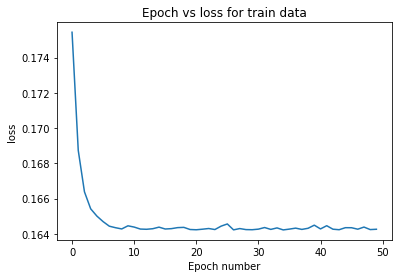

In [60]:
plt.close();
plt.plot(range(epochs),train_log_loss)
plt.xlabel('Epoch number')
plt.ylabel('loss')
plt.title('Epoch vs loss for train data')
plt.show();

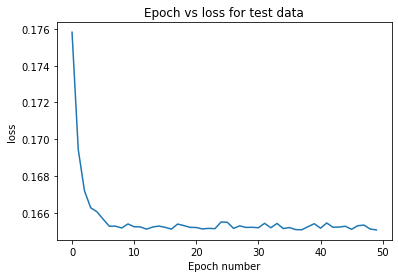

In [61]:
plt.close();
plt.plot(range(epochs),test_log_loss)
plt.xlabel('Epoch number')
plt.ylabel('loss')
plt.title('Epoch vs loss for test data')
plt.show();